In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [127]:
# The datasset and feature extraction is done by Hamza
df = pd.read_csv("urldata.csv")
df.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,metacafe.com,0,0,1,3,0,0,0,0,1,1,1,1,0
1,youtube.com,0,0,0,1,0,0,0,0,0,0,1,0,0
2,oliver-hardy.gonetoosoon.org,0,0,0,0,0,0,0,1,1,1,1,1,0
3,sportsillustrated.cnn.com,0,0,1,10,0,0,0,0,1,1,1,1,0
4,city-data.com,0,0,1,3,0,0,0,1,0,0,1,0,0


In [128]:
print(f"Dataset shape: {df.shape}")

print("\nFeature Names:")
print(df.columns.tolist())

print("Dataset Info:")
print(df.info())


Dataset shape: (10000, 14)

Feature Names:
['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'iFrame', 'Mouse_Over', 'Right_Click', 'Web_Forwards', 'Label']
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   iFrame         10000 non-null  int64 
 10  Mouse_Over     10000 non-null  int64 
 11  Right_Click    10000 non-null  int64 
 12  Web_Forwards   10000 non-null  int64 
 13  La

In [129]:
data = df.drop(['Domain'], axis = 1).copy()
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [130]:
# shuffling the rows in the dataset
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0,1,3,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,1,1,1,1,1
3,0,0,0,2,0,0,0,0,1,0,1,0,1
4,0,0,1,4,0,0,0,0,0,0,1,0,1


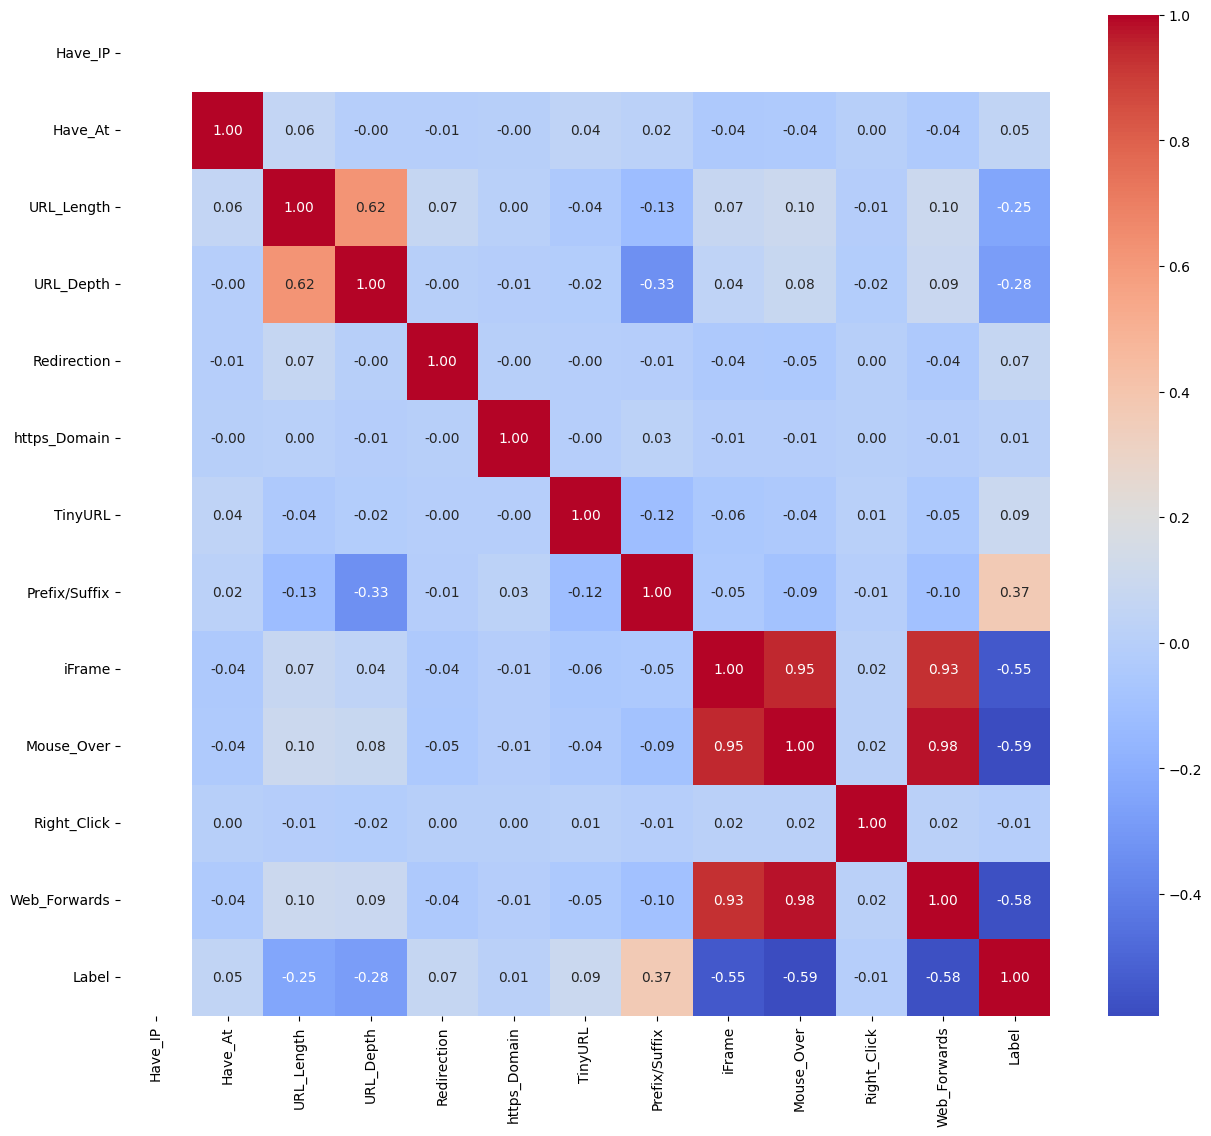

In [131]:
plt.figure(figsize=(15,13))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

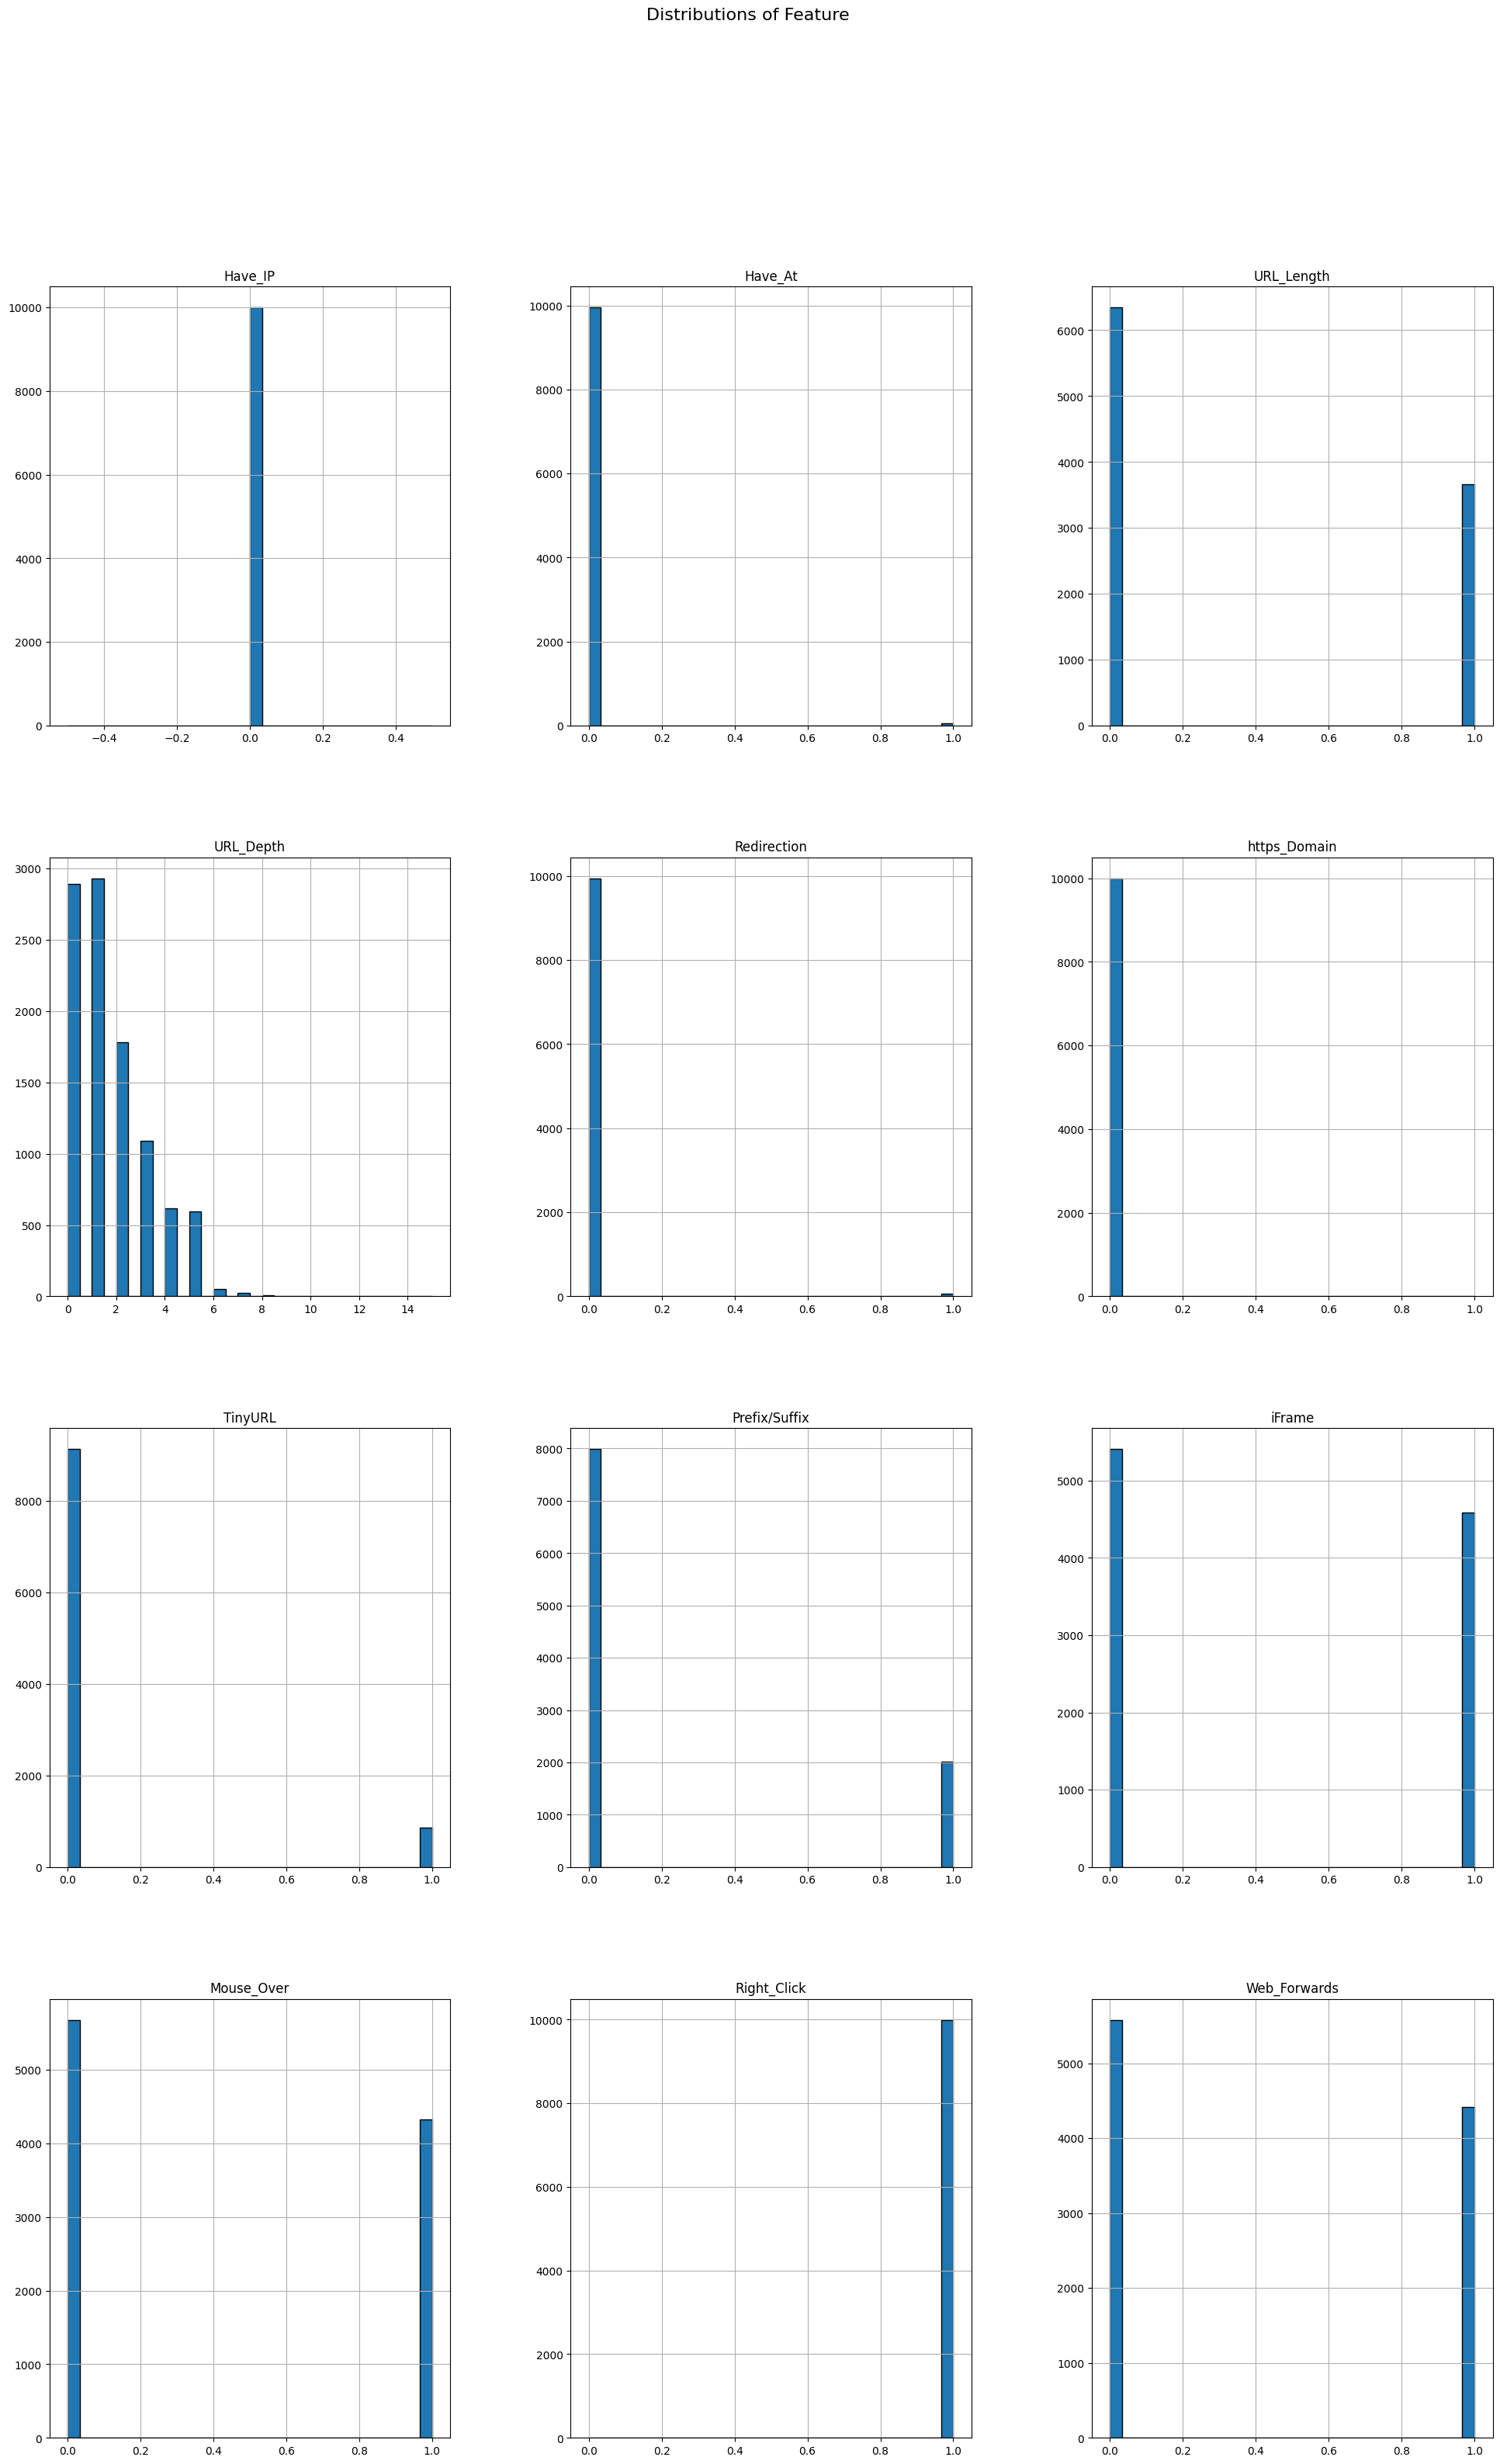

In [132]:
df_numeric = df.drop(columns=['Domain', 'Label'])

df_numeric.hist(bins=30, figsize=(24, 36), edgecolor='black')
plt.suptitle("Distributions of Feature", fontsize=16)
plt.show()

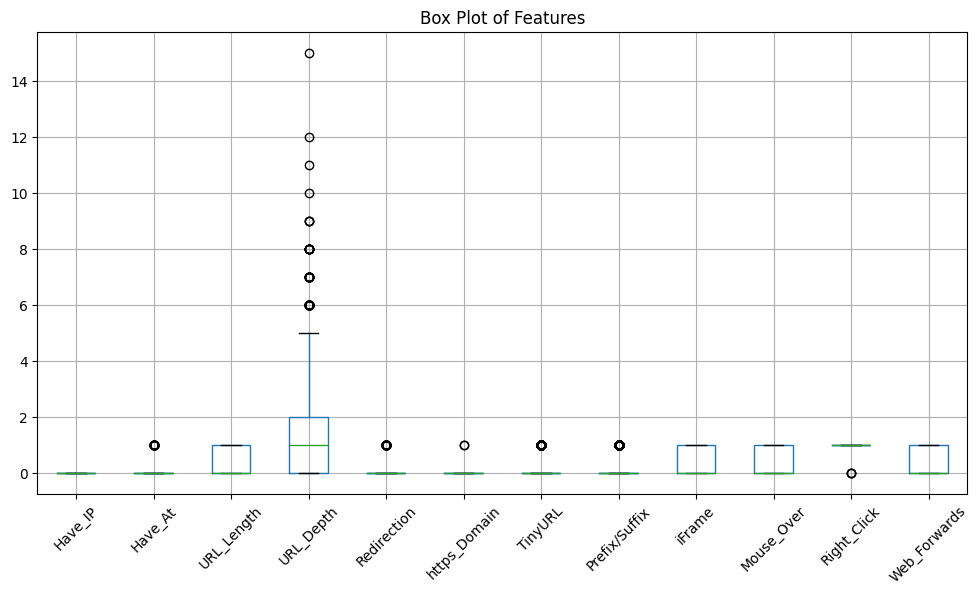

In [133]:
plt.figure(figsize=(12, 6))
df_numeric.boxplot(rot=45)
plt.title("Box Plot of Features")
plt.show()

In [134]:
data["Label"].value_counts()

# This is a balanced dataset

Label
0    5000
1    5000
Name: count, dtype: int64

In [135]:
print(data["Have_IP"].value_counts())

data = data.drop(['Have_IP'], axis = 1).copy()

Have_IP
0    10000
Name: count, dtype: int64


In [136]:
data.head()

,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,1,3,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,1,1,1,1,1
3,0,0,2,0,0,0,0,1,0,1,0,1
4,0,1,4,0,0,0,0,0,0,1,0,1


In [137]:
data_y = data["Label"]
data_x = data.drop(['Label'], axis = 1).copy()

In [138]:
print("Input Overview: ", data_x.info())
print()
print("Label Overview: ", data_y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Have_At        10000 non-null  int64
 1   URL_Length     10000 non-null  int64
 2   URL_Depth      10000 non-null  int64
 3   Redirection    10000 non-null  int64
 4   https_Domain   10000 non-null  int64
 5   TinyURL        10000 non-null  int64
 6   Prefix/Suffix  10000 non-null  int64
 7   iFrame         10000 non-null  int64
 8   Mouse_Over     10000 non-null  int64
 9   Right_Click    10000 non-null  int64
 10  Web_Forwards   10000 non-null  int64
dtypes: int64(11)
memory usage: 859.5 KB
Input Overview:  None

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Label
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.3 KB
Label Overview:  None


In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=42)

In [140]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7000, 11)
X_test shape: (3000, 11)
y_train shape: (7000,)
y_test shape: (3000,)


Logistic Regression Accuracy: 0.777


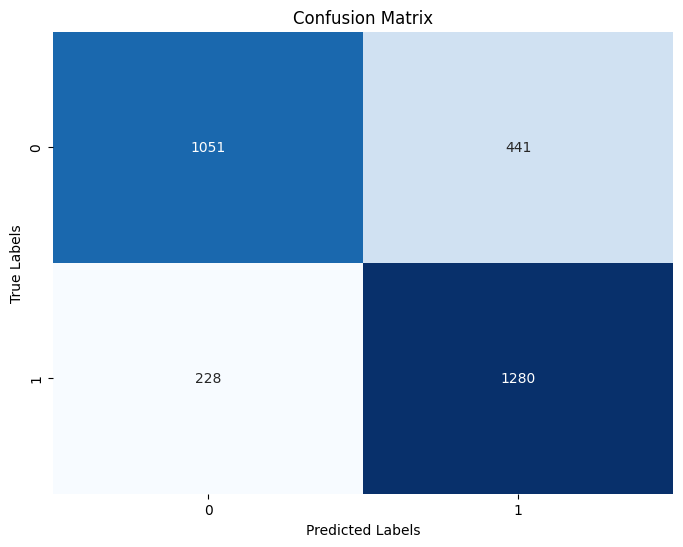

Precision: 0.7437536316095293
Recall: 0.8488063660477454
F1-Score: 0.7928151130380923
              precision    recall  f1-score   support

           0       0.82      0.70      0.76      1492
           1       0.74      0.85      0.79      1508

    accuracy                           0.78      3000
   macro avg       0.78      0.78      0.78      3000
weighted avg       0.78      0.78      0.78      3000



In [141]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

acc_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", acc_log)

cm =  confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

precision = precision_score(y_test, y_pred_log)
recall = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

print(classification_report(y_test, y_pred_log))

In [142]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Classifier Accuracy:", acc_svm)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

print(classification_report(y_test, y_pred_svm))

SVM Classifier Accuracy: 0.863
Confusion Matrix:
 [[1267  225]
 [ 186 1322]]
Precision: 0.8545572074983839
Recall: 0.876657824933687
F1-Score: 0.8654664484451718
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1492
           1       0.85      0.88      0.87      1508

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000



In [143]:
dt_clf = DecisionTreeClassifier(random_state=50,max_depth=5)
dt_clf.fit(X_train, y_train)
y_pred_dt_clf = dt_clf.predict(X_test)
acc_dt_clf = accuracy_score(y_test, y_pred_dt_clf)
print("Decision Tree Classifier Accuracy:", acc_dt_clf)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt_clf))

precision = precision_score(y_test, y_pred_dt_clf)
recall = recall_score(y_test, y_pred_dt_clf)
f1 = f1_score(y_test, y_pred_dt_clf)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

print(classification_report(y_test, y_pred_dt_clf))

Decision Tree Classifier Accuracy: 0.8526666666666667
Confusion Matrix:
 [[1259  233]
 [ 209 1299]]
Precision: 0.847911227154047
Recall: 0.8614058355437666
F1-Score: 0.8546052631578948
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1492
           1       0.85      0.86      0.85      1508

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



In [144]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf_clf = rf_clf.predict(X_test)
acc_rf_clf = accuracy_score(y_test, y_pred_rf_clf)
print("Random Forest Classifier Accuracy:", acc_rf_clf)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_clf))

precision = precision_score(y_test, y_pred_rf_clf)
recall = recall_score(y_test, y_pred_rf_clf)
f1 = f1_score(y_test, y_pred_rf_clf)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

print(classification_report(y_test, y_pred_rf_clf))

Random Forest Classifier Accuracy: 0.867
Confusion Matrix:
 [[1297  195]
 [ 204 1304]]
Precision: 0.8699132755170114
Recall: 0.8647214854111406
F1-Score: 0.8673096109078816
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1492
           1       0.87      0.86      0.87      1508

    accuracy                           0.87      3000
   macro avg       0.87      0.87      0.87      3000
weighted avg       0.87      0.87      0.87      3000



In [145]:
from sklearn.model_selection import KFold

# K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=50,max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Cross-validation
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}:")

    fold_accuracies = []

    for train_index, test_index in kf.split(data_x):
        X_train_fold, X_test_fold = data_x.iloc[train_index], data_x.iloc[test_index]
        y_train_fold, y_test_fold = data_y.iloc[train_index], data_y.iloc[test_index]

        model.fit(X_train_fold, y_train_fold)
        y_pred_fold = model.predict(X_test_fold)
        accuracy = accuracy_score(y_test_fold, y_pred_fold)
        fold_accuracies.append(accuracy)

    print(fold_accuracies)
    average_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"Average accuracy for {model_name}: {average_accuracy}")


Evaluating Logistic Regression:
[0.78, 0.7925, 0.7845, 0.798, 0.804]
Average accuracy for Logistic Regression: 0.7918000000000001

Evaluating SVM:
[0.8625, 0.8705, 0.8735, 0.86, 0.868]
Average accuracy for SVM: 0.8669

Evaluating Decision Tree:
[0.8495, 0.864, 0.8725, 0.86, 0.871]
Average accuracy for Decision Tree: 0.8634000000000001

Evaluating Random Forest:
[0.865, 0.8775, 0.8795, 0.868, 0.873]
Average accuracy for Random Forest: 0.8725999999999999


Let's see the result

Logistic Regression Log Odds:
Prefix/Suffix    2.939501
Redirection      2.608770
TinyURL          1.131315
Have_At          0.998114
Web_Forwards     0.515116
https_Domain     0.016059
iFrame           0.011538
URL_Depth       -0.119168
Right_Click     -0.273933
URL_Length      -0.913939
Mouse_Over      -3.988692
dtype: float64


/var/folders/ly/4knwk5td4wx38msck62s68_40000gn/T/ipykernel_5814/3760476017.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=log_odds_series.index, y=log_odds_series.values, palette="coolwarm")


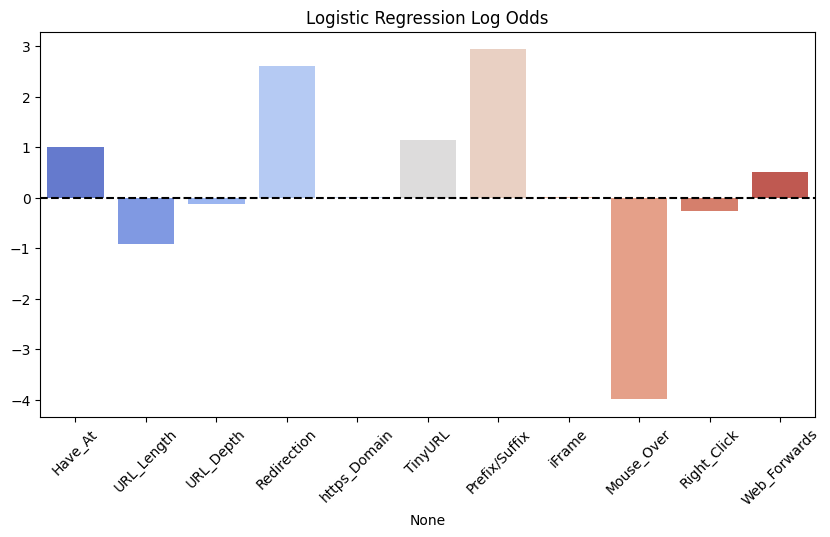

In [146]:
log_odds = log_reg.coef_  # This returns a 2D array (for binary classification, shape is (1, n_features))
log_odds_series = pd.Series(log_odds[0], index=X_train.columns)
print("Logistic Regression Log Odds:")
print(log_odds_series.sort_values(ascending=False))

plt.figure(figsize=(10, 5))
sns.barplot(x=log_odds_series.index, y=log_odds_series.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.axhline(0, color="black", linestyle="--")
plt.title("Logistic Regression Log Odds")
plt.show()

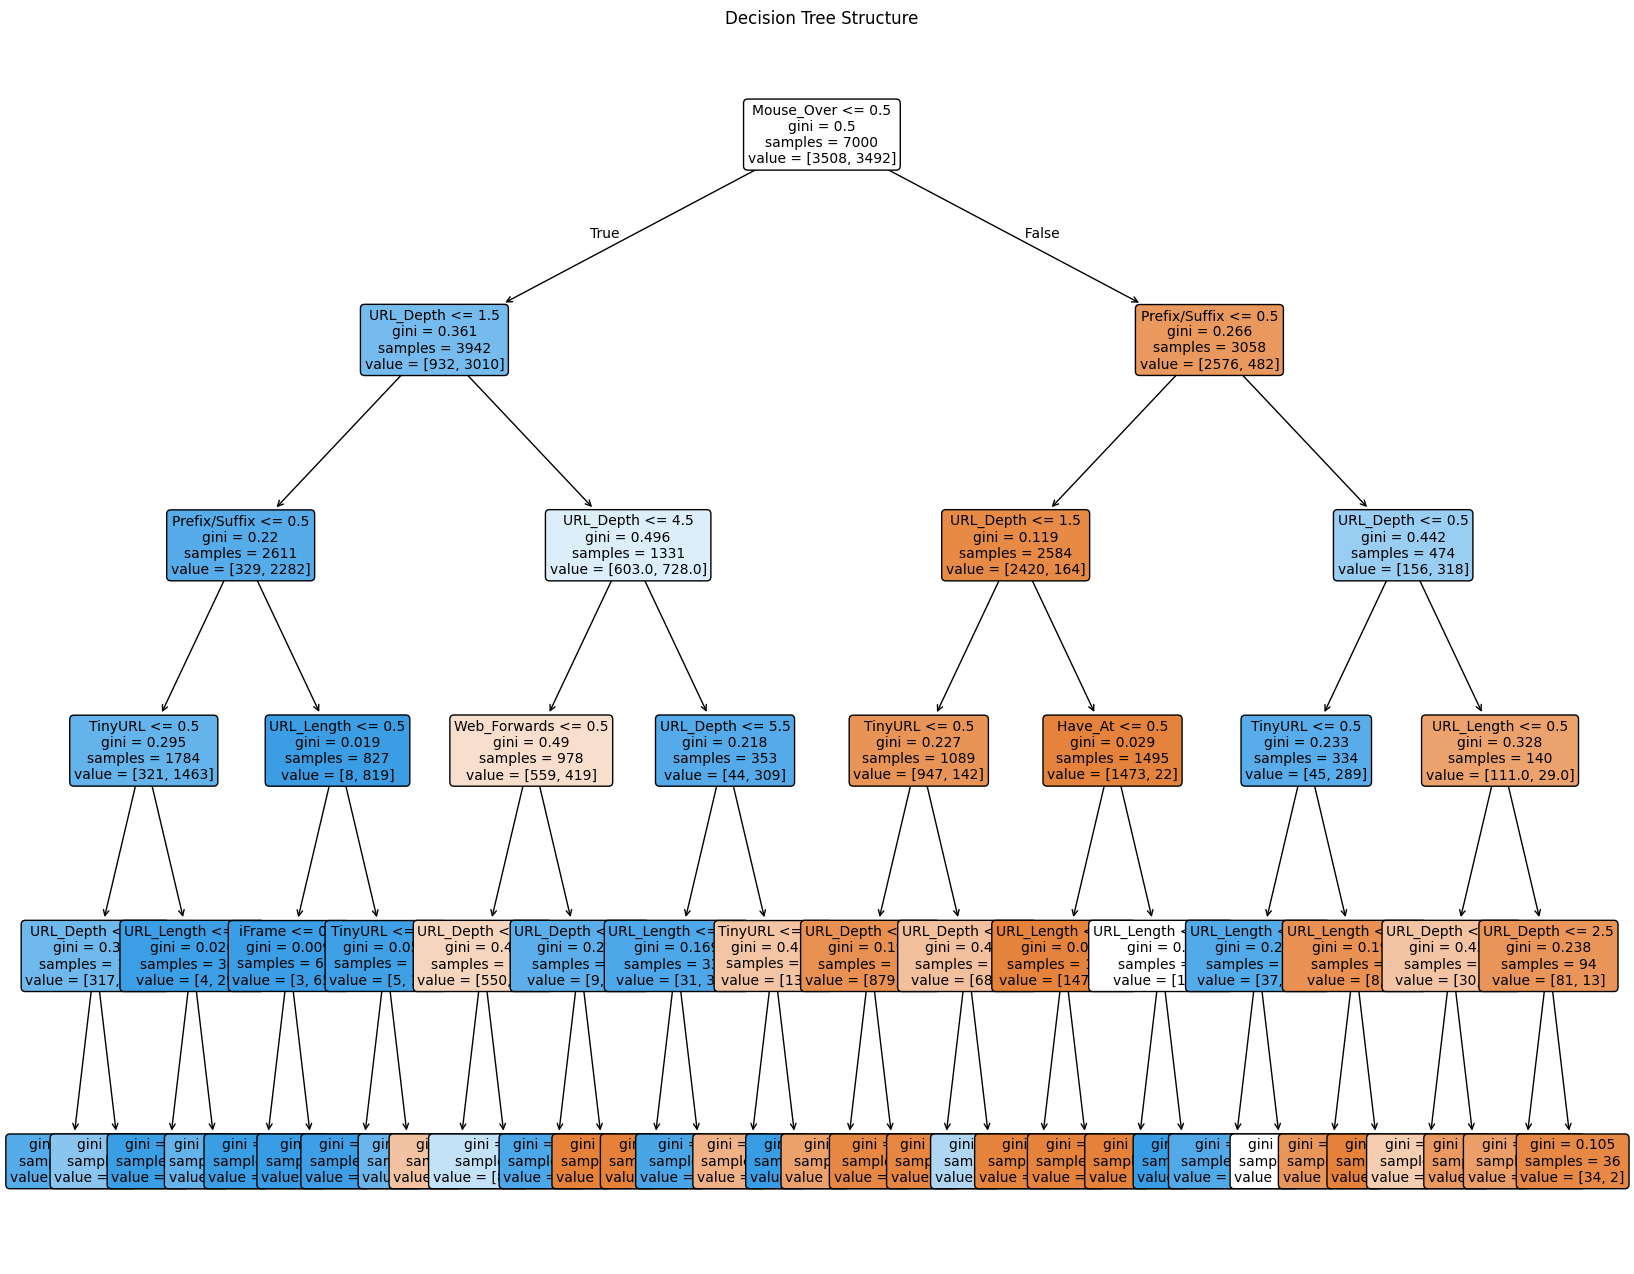

In [147]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 16))
plot_tree(dt_clf, feature_names=X_train.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Structure")
plt.show()

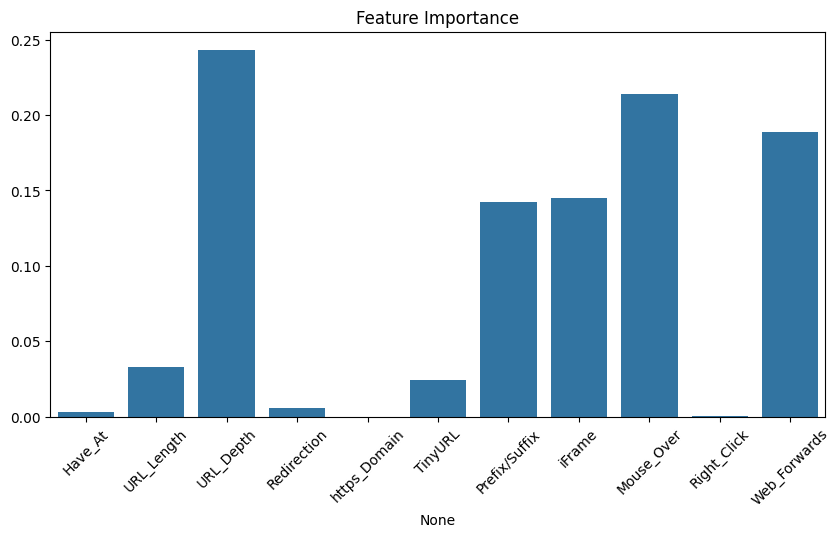

In [148]:
importance = rf_clf.feature_importances_
plt.figure(figsize=(10, 5))
sns.barplot(x=X_train.columns, y=importance)
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.show()

In [149]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter'  : [100,1000,2500,5000]
    }
]

param_grid_svc = {
    'C': [0.1, 1, 10, 100, 1000],  
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['rbf']
    } 

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search_lr = GridSearchCV(estimator=log_reg, param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svc = GridSearchCV(estimator=svm, param_grid=param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt = GridSearchCV(estimator=dt_clf, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_lr.fit(X_train, y_train)
grid_search_svc.fit(X_train, y_train)
grid_search_dt.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)

print("Logistic Regression - Best Hyperparameters:", grid_search_lr.best_params_)
print("Logistic Regression - Best Cross-Validated Accuracy:", grid_search_lr.best_score_)

print("SVM - Best Hyperparameters:", grid_search_svc.best_params_)
print("SVM - Best Cross-Validated Accuracy:", grid_search_svc.best_score_)

print("Decision Tree - Best Hyperparameters:", grid_search_dt.best_params_)
print("Decision Tree - Best Cross-Validated Accuracy:", grid_search_dt.best_score_)

print("Random Forest - Best Hyperparameters:", grid_search_rf.best_params_)
print("Random Forest - Best Cross-Validated Accuracy:", grid_search_rf.best_score_)

/Users/hientran/Downloads/Git/SomeProjects/data_alchemy_assignments/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hientran/Downloads/Git/SomeProjects/data_alchemy_assignments/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hientran/Downloads/Git/SomeProjects/data_alchemy_assignments/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hientran/Downloads/Git/SomeProjects/data_alchemy_assignments/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hientran/Downloads/Git/SomeProjects/data_

Logistic Regression - Best Hyperparameters: {'C': np.float64(0.00026366508987303583), 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression - Best Cross-Validated Accuracy: 0.8059999999999998
SVM - Best Hyperparameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
SVM - Best Cross-Validated Accuracy: 0.8722857142857144
Decision Tree - Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Decision Tree - Best Cross-Validated Accuracy: 0.8721428571428571
Random Forest - Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Random Forest - Best Cross-Validated Accuracy: 0.8727142857142857


In [176]:
log_reg_best = LogisticRegression(**grid_search_lr.best_params_, random_state=42)
svm_best = SVC(**grid_search_svc.best_params_, random_state=42, probability=True)
dt_clf_best = DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=42)
rf_clf_best = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)

# Fit the models
log_reg_best.fit(X_train, y_train)
svm_best.fit(X_train, y_train)
dt_clf_best.fit(X_train, y_train)
rf_clf_best.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [177]:
models = {
    "Logistic Regression": log_reg_best,
    "SVM": svm_best,
    "Decision Tree": dt_clf_best,
    "Random Forest": rf_clf_best
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name} Test Set Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)

Logistic Regression Test Set Evaluation:
Accuracy: 0.787
Confusion Matrix:
 [[1153  339]
 [ 300 1208]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78      1492
           1       0.78      0.80      0.79      1508

    accuracy                           0.79      3000
   macro avg       0.79      0.79      0.79      3000
weighted avg       0.79      0.79      0.79      3000

--------------------------------------------------
SVM Test Set Evaluation:
Accuracy: 0.8616666666666667
Confusion Matrix:
 [[1269  223]
 [ 192 1316]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1492
           1       0.86      0.87      0.86      1508

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000

--------------------------------------------

In [178]:
voting_clf = VotingClassifier(estimators=[
    ('log_reg', log_reg_best),
    ('svm', svm_best),
    ('dt', dt_clf_best),
    ('rf', rf_clf_best)
], voting='soft')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(C=np.float64(0.00026366508987303583),
                                                 random_state=42)),
                             ('svm',
                              SVC(C=0.1, gamma=1, probability=True,
                                  random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     max_features='sqrt',
                                                     min_samples_leaf=2,
                                                     random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42))],
                 voting='soft')

In [183]:
y_pred = voting_clf.predict(X_test)
voting_accuracy = voting_clf.score(X_test, y_test)
print(f"Voting Classifier Accuracy: {voting_accuracy}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Voting Classifier Accuracy: 0.8656666666666667
Confusion Matrix:
 [[1272  220]
 [ 183 1325]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1492
           1       0.86      0.88      0.87      1508

    accuracy                           0.87      3000
   macro avg       0.87      0.87      0.87      3000
weighted avg       0.87      0.87      0.87      3000



# Trying to further improving random forest

In [ ]:
threshold = 0.05 
important_features = X_train.columns[importance > threshold]

X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

rf_clf_reduced = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt', 'log2']
}

#A fresh search with smaller features
grid_search = GridSearchCV(estimator=rf_clf_reduced, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_reduced, y_train)

best_rf_model = grid_search.best_estimator_

y_pred_reduced = best_rf_model.predict(X_test_reduced)

print(f"Reduced Random Forest Accuracy after GridSearch: {best_rf_model.score(X_test_reduced, y_test)}")
print(f"Best hyperparameters: {grid_search.best_params_}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_reduced))
print("Classification Report:\n", classification_report(y_test, y_pred_reduced))

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_est